### 데이터 시각화 방법
1. DataFrame에 내장되어 있는 plot 함수 이용하기
   - 데이터 전처리 후 빠르고 간단하게 시각화 해볼 수 있다.
2. 파이썬 시각화 라이브러리인 matplotlib를 활용하기
   - 시각화 결과물의 커스터마이징에 최적화되어있다.
3. 모양의 다양성 및 아름다운 결과물을 위해 seaborn같은 외부 라이브러리 활용

### Pandas plot 함수를 이용한 데이터 시각화
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

In [3]:
import pandas as pd

##### 1.line chart 그리기
- DataFrame.plot(kind="line")

##### 연도별 입사자의 추세 확인해보기

In [6]:
hr_info = pd.read_csv("./data/hr-info.csv", encoding="euc-kr")

In [7]:
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [8]:
# HIRE_DATE 컬럼에서 연도를 추출하고
# 각 연도별 사람 수를 세어보자

# hr_info["HIRE_DATE"].str.split("-").str[0]
year = hr_info["HIRE_DATE"].str[:4].astype(int)
hire_date_year_cnt = year.value_counts()

<Axes: xlabel='HIRE_DATE', ylabel='HIRE_PERSON_COUNT'>

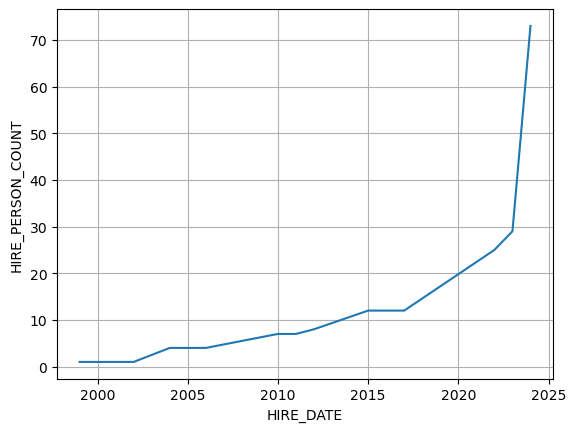

In [9]:
hire_date_year_cnt.sort_index().plot(kind="line", ylabel="HIRE_PERSON_COUNT", grid=True)

2.bar chart
- DataFrame.plot(kind="bar")

In [11]:
# 한글폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [12]:
# 폰트정보 확인하기
from matplotlib import font_manager
font_manager.findSystemFonts()

['C:\\Windows\\Fonts\\ANTQUAI.TTF',
 'C:\\Windows\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\arialbi.ttf',
 'C:\\Windows\\Fonts\\TCCM____.TTF',
 'C:\\Windows\\Fonts\\segoescb.ttf',
 'C:\\Windows\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\VIVALDII.TTF',
 'C:\\Windows\\Fonts\\BRLNSDB.TTF',
 'C:\\Windows\\Fonts\\ARIALNI.TTF',
 'C:\\Windows\\Fonts\\HANBatangExt.ttf',
 'C:\\Windows\\Fonts\\trebucit.ttf',
 'C:\\Windows\\Fonts\\gulim.ttc',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\BOOKOS.TTF',
 'C:\\Windows\\Fonts\\PAPYRUS.TTF',
 'C:\\Windows\\Fonts\\NirmalaB.ttf',
 'C:\\Windows\\Fonts\\seguihis.ttf',
 'C:\\Windows\\Fonts\\HARLOWSI.TTF',
 'C:\\Windows\\Fonts\\DUBAI-BOLD.TTF',
 'C:\\Windows\\Fonts\\monbaiti.ttf',
 'C:\\Windows\\Fonts\\corbelli.ttf',
 'C:\\Windows\\Fonts\\BOD_R.TTF',
 'C:\\Windows\\Fonts\\FRADMCN.TTF',
 'C:\\Windows\\Fonts\\HANDotumB.ttf',
 'C:\\Windows\\Fonts\\javatext.ttf',
 'C:\\Windows\\Fonts\\GIL_____.TTF',
 'C:\\Windows\\Fonts\\SNAP____.TTF',
 'C:\\Windo

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.000000
박사 학위,8166.666667
석사 학위,6900.000000
전문대 학위,5050.000000
학사 학위,5727.044025


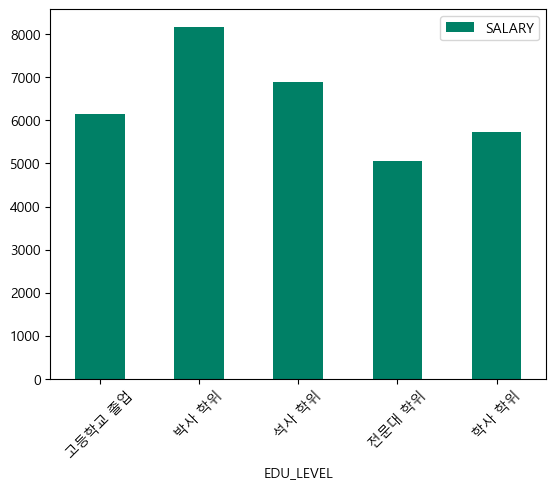

In [13]:
# 학위별 평균연봉을 bar chart로 시각화
edu_salary = hr_info[['SALARY','EDU_LEVEL']].groupby(by = 'EDU_LEVEL').mean()
edu_salary.plot(kind="bar", colormap="summer", rot=45.0)
display(edu_salary)

In [14]:
salary_mean = hr_info[["SALARY","EDU_LEVEL","GENDER"]].groupby(by=["EDU_LEVEL","GENDER"]).mean().round()

<Axes: xlabel='EDU_LEVEL,GENDER'>

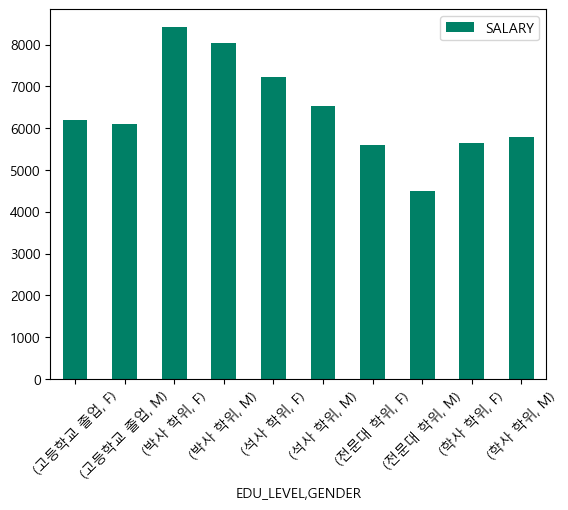

In [15]:
salary_mean.plot(kind="bar", colormap="summer", rot=45.0)

<Axes: title={'center': '교육수준과 성별에 따른 평균연봉 비교'}, xlabel='평균연봉', ylabel='교육수준'>

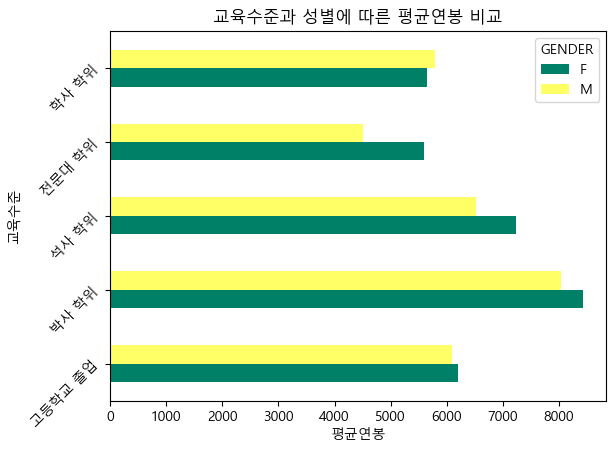

In [16]:
# 시각적인 비교를 위해 같은 교육수준을 한 그룹으로 묶어 남/여 가 비교되도록 만들기
# 데이터 재구조화 필요
salary_mean_pivot = salary_mean.reset_index().pivot(index="EDU_LEVEL",
                                                   columns="GENDER",
                                                   values="SALARY")
salary_mean_pivot.plot(kind="barh", colormap="summer", rot=45.0, xlabel="평균연봉", ylabel="교육수준", title="교육수준과 성별에 따른 평균연봉 비교")

array([<Axes: title={'center': 'F'}, xlabel='평균연봉', ylabel='교육수준'>,
       <Axes: title={'center': 'M'}, xlabel='평균연봉', ylabel='교육수준'>],
      dtype=object)

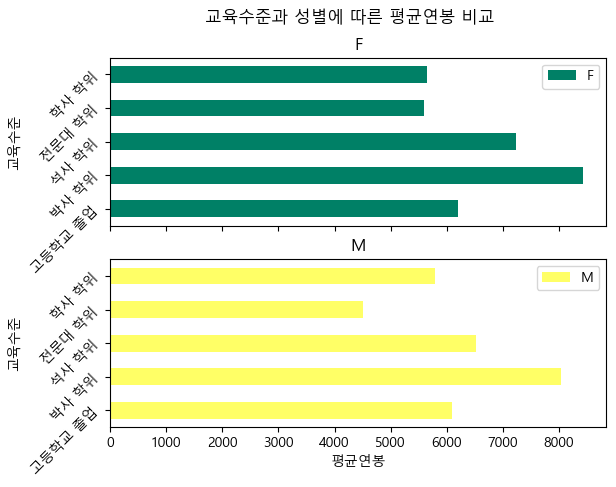

In [17]:
# subplots=True
salary_mean_pivot.plot(kind="barh", colormap="summer", rot=45.0, xlabel="평균연봉", ylabel="교육수준", title="교육수준과 성별에 따른 평균연봉 비교", subplots=True)

###### [실습] 부서별 평균 연봉 비교하기
- figsize : 그림의 크기를 조절하는 속성 -> figsize=(10.5) -> 가로,세로 inch 단위
- ylim : y축의 range설정 -> ylim=(4000,7000) -> 축의 최소,최대 값 설정

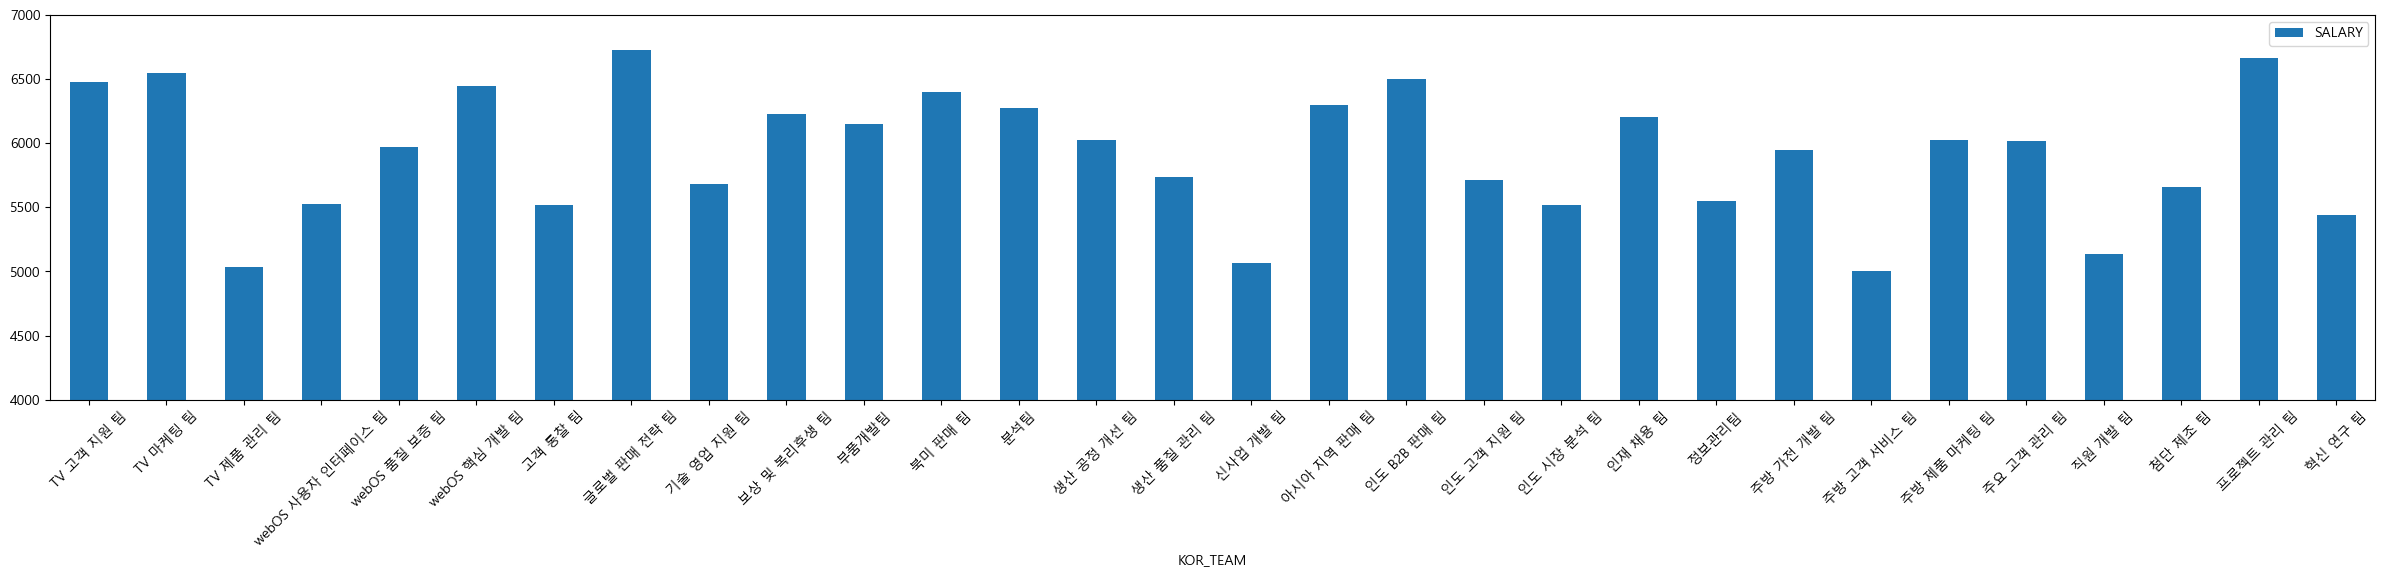

In [20]:
org_info = pd.read_csv("./data/org-info.csv", encoding="euc-kr")

<Axes: title={'center': '팀 별 평균연봉 차트'}, xlabel='팀 이름', ylabel='평균연봉'>

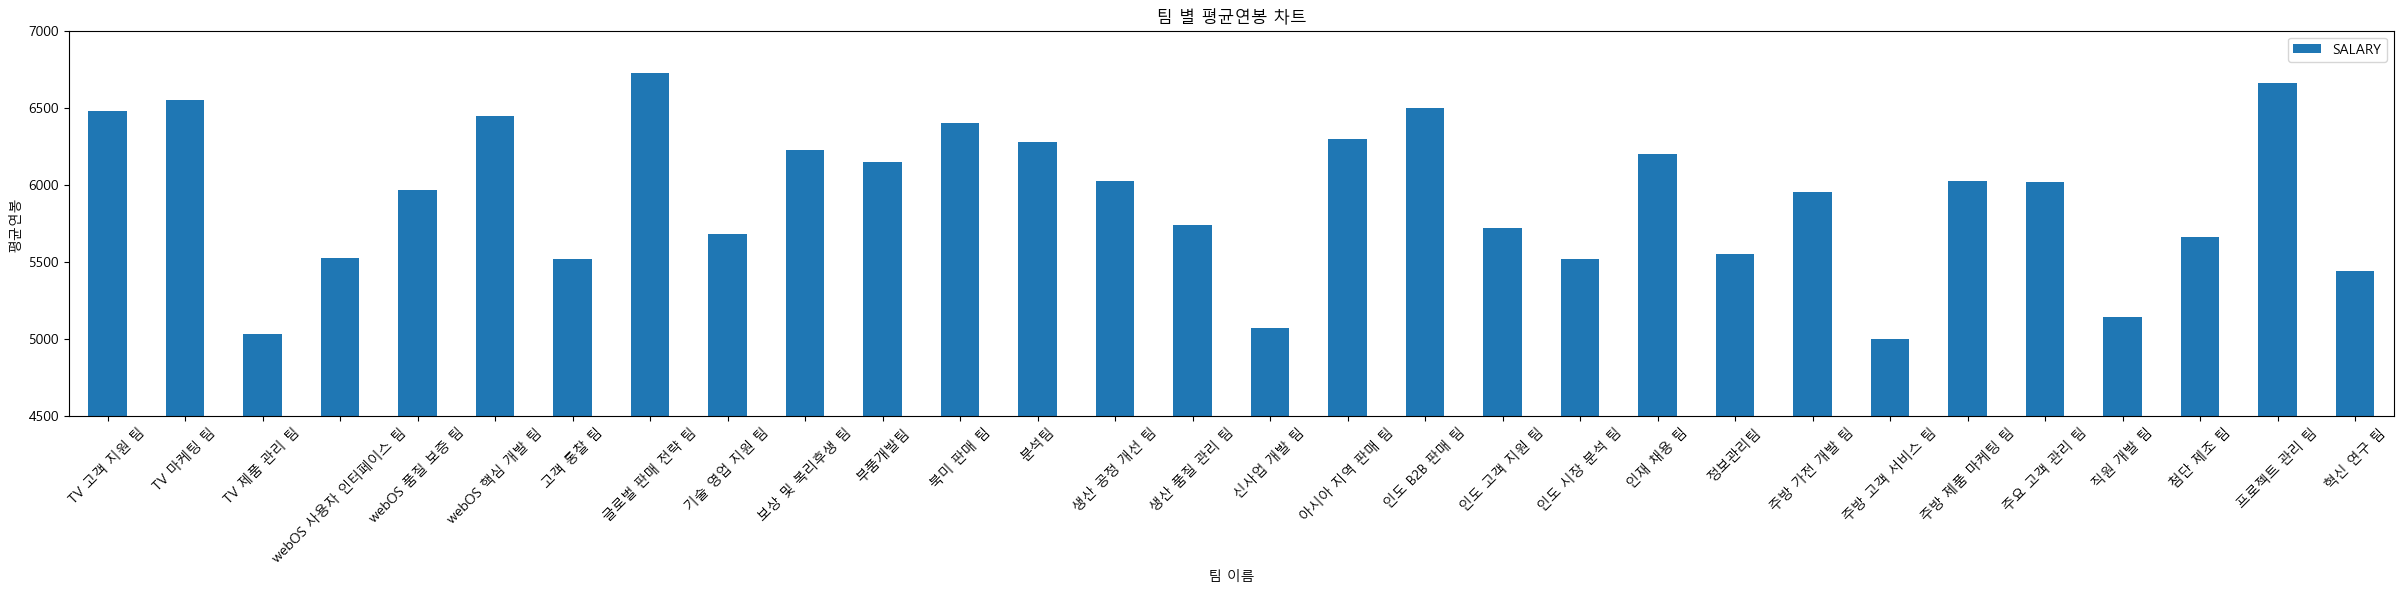

In [43]:
org_merge = hr_info.merge(org_info, on="ORG_CD")

org_merge_sal = org_merge[["KOR_TEAM","SALARY"]].groupby(by="KOR_TEAM").mean()
org_merge_sal.plot(kind="bar", ylim=(4500,7000),  figsize=(30,5),  rot=45.0, xlabel="팀 이름", ylabel="평균연봉", title="팀 별 평균연봉 차트")


##### 3.pie chart
- DataFrame.plot(kind="pie")

<Axes: title={'center': '각 본부의 인원비율'}, ylabel='count'>

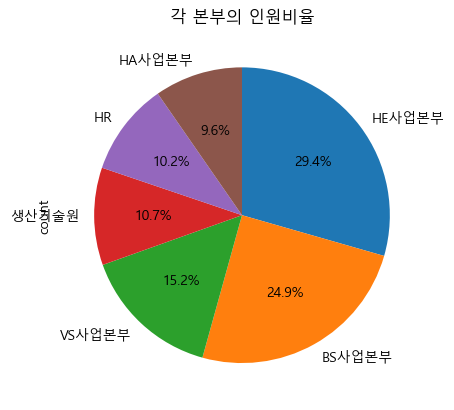

In [45]:
#각 본부에 속한 인원의 비율을 알아보기
org_merge['KOR_DIVISION'].value_counts().plot(kind="pie", startangle=90, counterclock=False, autopct='%.1f%%', title="각 본부의 인원비율")

###### 4.scatter(산점도)
- DataFrame.plot(kind="scatter")

<Axes: xlabel='AGE', ylabel='SALARY'>

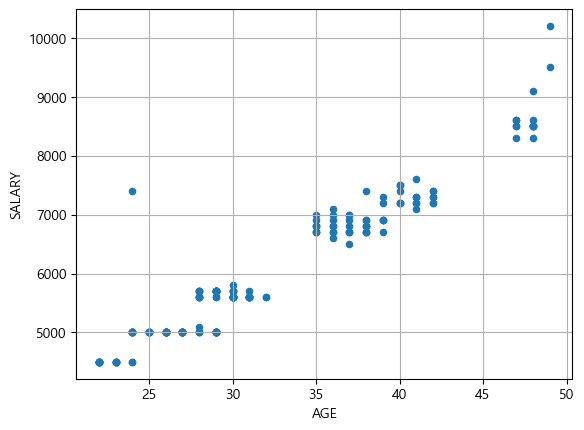

In [47]:
# 나이에 따른 연봉의 분포정도
hr_info.plot(kind="scatter", x="AGE", y="SALARY", grid=True)

###### 5.histogram

<Axes: ylabel='Frequency'>

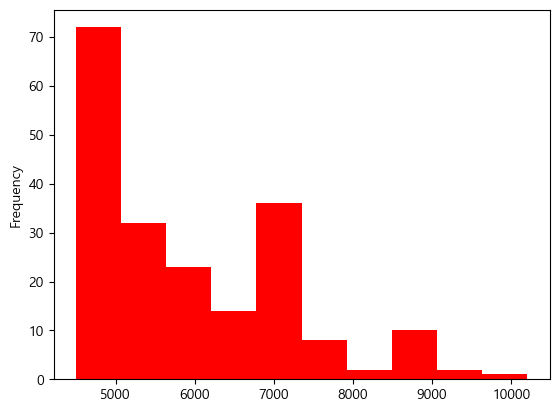

In [49]:
# 나이에 따른 연봉의 분포정도
hr_info['SALARY'].plot(kind="hist", color="red")

#### Seaborn을 이용한 시각화
- https://seaborn.pydata.org/examples/index.html

In [57]:
import seaborn as sns

<Axes: xlabel='SALARY', ylabel='Count'>

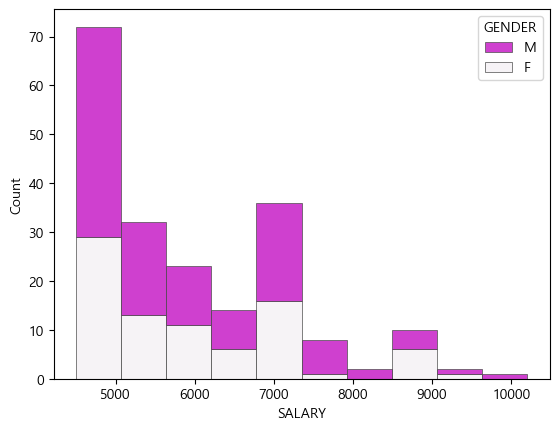

In [59]:
sns.histplot(
    hr_info, # 사용할 데이터 셋
    x="SALARY", # 구간화할 컬럼명
    hue="GENDER", # 하나의 구간에서 다시 분할할 기준이되는 컬럼(카테고리 형)
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    # log_scale=True,
)

###### 2.버블차트
- 차트내에 많은 데이터를 표기 할 수 있다
- 나이와 근속연수에 따른 부서별 연봉비교
- 나이와 근속연수에 따른 직책별 연봉비교

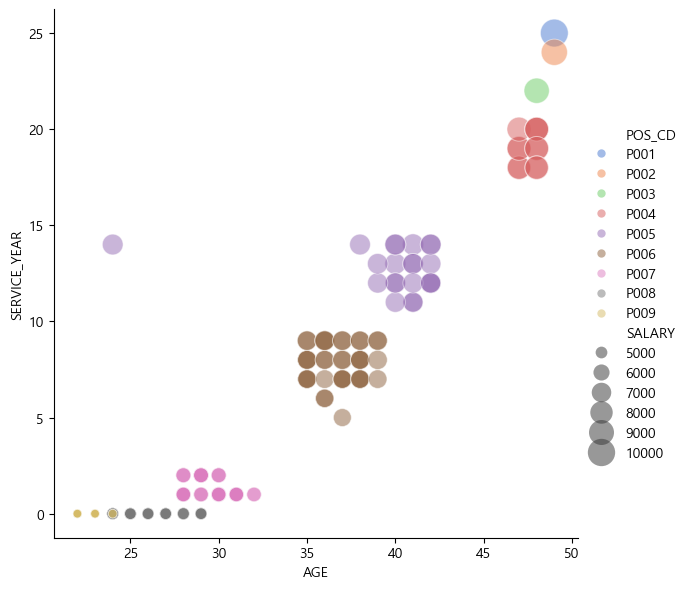

In [62]:
sns.relplot(x="AGE", y="SERVICE_YEAR",
            hue="POS_CD",
            size="SALARY",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6,
            data=hr_info) # 사용할 데이터셋


##### 3.heatmap
- 상관계수 시각화

In [64]:
hr_corr = hr_info[["PERFORMANCE_SCORE","SALARY","AGE","SERVICE_YEAR","TRAINING_HOURS"]].corr()
hr_corr

,PERFORMANCE_SCORE,SALARY,AGE,SERVICE_YEAR,TRAINING_HOURS
PERFORMANCE_SCORE,1.000000,0.609152,0.582203,0.492801,0.551200
SALARY,0.609152,1.000000,0.961699,0.970875,0.628931
AGE,0.582203,0.961699,1.000000,0.932563,0.575867
SERVICE_YEAR,0.492801,0.970875,0.932563,1.000000,0.559911
TRAINING_HOURS,0.551200,0.628931,0.575867,0.559911,1.000000


In [67]:
# seaborn 버전 변경
# !pip install seaborn==0.13.0

<Axes: >

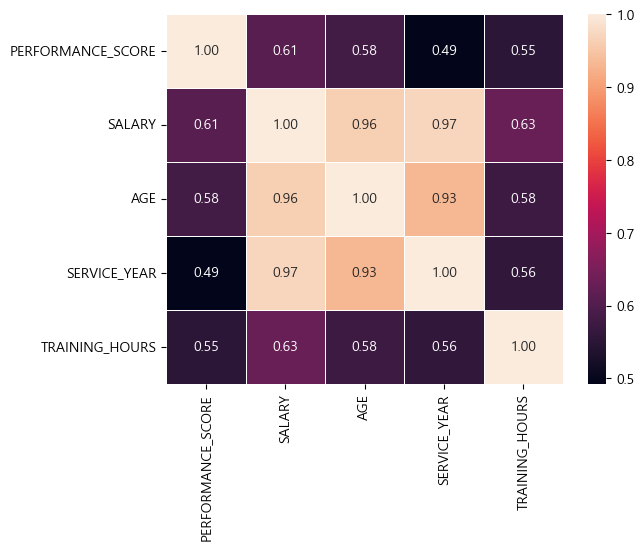

In [69]:
sns.heatmap(hr_corr, # 히트맵으로 그릴 데이터
            annot=True,
            fmt=".2f",
            linewidths=.5,
            # ax=ax # matplotlib 과 연동해서 쓸때 사용
           )